In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from PIL import Image
import os




In [2]:
image_size=(128,128)
data_dir_aug="Brain MRI\\Augmented Data"
data_dir_raw="Brain MRI\\Raw Data\\Raw"
catgories=["Glioma","Meningioma","Normal","Pituitary"]
X=[]
y=[]

In [3]:
for lable,cetagory in enumerate(catgories):
    folder=os.path.join(data_dir_raw,cetagory)
    for filname in os.listdir(folder):
        try:
            img_path=os.path.join(folder,filname)
            img=Image.open(img_path).convert("L")    # Convert to grayscale
            img=img.resize(image_size)
            image_array=np.array(img).flatten()/255
            
            X.append(image_array)
            y.append(lable)
        except Exception as e:
            print(f"erorr loading{filname}: {e}")

In [4]:
len(X)

1505

In [5]:
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
qda_mdl=QuadraticDiscriminantAnalysis(reg_param=0.3)

In [36]:
qda_mdl.fit(train_x,train_y)

c:\Users\sulim\miniconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\sulim\miniconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\sulim\miniconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\sulim\miniconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


,priors,None
,reg_param,0.3
,store_covariance,False
,tol,0.0001


In [8]:
# param_grid = {
#     'solver': ['svd', 'lsqr', 'eigen'],
#     'shrinkage': ['auto', None]
# }

In [24]:

# lda = LinearDiscriminantAnalysis()
# grid_search = GridSearchCV(lda, param_grid, cv=5)
# grid_search.fit(train_x, train_y)

# print("Best parameters:", grid_search.best_params_)

In [37]:
qda_mdl.score(test_x,test_y)

0.46179401993355484

## Test score of model by varing the value of Peremeter in model
| reg_param  | Model    | test score    |
|---------    |-----      |----------|
| none         | QDA       | 0.39   |
| 0.2        | QDA       | 0.4750   |
| 0.3        | QDA       | 0.4617   |
| 0.4        | QDA       | 0.4551   |
| 0.5        | QDA       | 0.4352   |


In [38]:
le=LabelEncoder()
le.fit_transform(catgories)

array([0, 1, 2, 3])

In [39]:
train_y_pred=qda_mdl.predict(train_x)
test_y_pred=qda_mdl.predict(test_x)

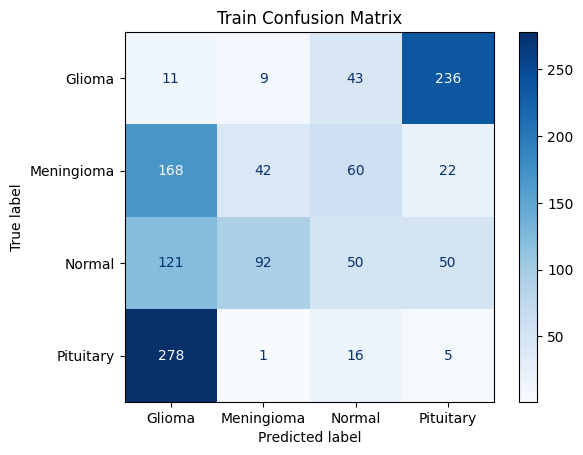

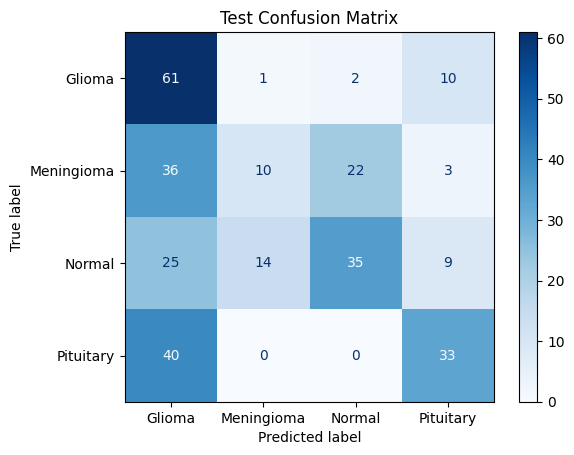

In [40]:
cm=confusion_matrix(train_y,train_y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le.classes_).plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

cm=confusion_matrix(test_y,test_y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le.classes_).plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [41]:

# Calculate performance metrics for training set
train_accuracy = accuracy_score(train_y, train_y_pred)
train_precision = precision_score(train_y, train_y_pred,average='micro')
train_recall = recall_score(train_y, train_y_pred,average='micro')
train_f1 = f1_score(train_y, train_y_pred,average='micro')

# Calculate performance metrics for test set
test_accuracy = accuracy_score(test_y, test_y_pred)
test_precision = precision_score(test_y, test_y_pred,average='micro')
test_recall = recall_score(test_y, test_y_pred,average='micro')
test_f1 = f1_score(test_y, test_y_pred,average='micro')


In [42]:
# Print performance metrics
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}")
print(f"Training F1-Score: {train_f1:.2f}")
print()
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Precision: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.2f}")
print(f"Test F1-Score: {test_f1:.2f}")


Training Accuracy: 0.09
Training Precision: 0.09
Training Recall: 0.09
Training F1-Score: 0.09

Test Accuracy: 0.46
Test Precision: 0.46
Test Recall: 0.46
Test F1-Score: 0.46
